In [128]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.datasets import reuters

In [129]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [130]:
def vectorize_sequence(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [131]:
from tensorflow.keras.utils import to_categorical

In [132]:
X_train = vectorize_sequence(train_data)
X_test = vectorize_sequence(test_data)

In [133]:
y_train_labels = to_categorical(train_labels)
y_test_labels = to_categorical(test_labels)

In [134]:
X_partial_train = X_train[1000:]
X_val = X_train[:1000]

In [135]:
X_partial_train.shape

(7982, 10000)

In [136]:
y_val = y_train_labels[:1000]
y_train = y_train_labels[1000:]

In [155]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(46, activation='softmax')
])

In [156]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [157]:
history = model.fit(
    X_partial_train, y_train,
    epochs = 9,
    batch_size=512,
    validation_data=(X_val, y_val),
    verbose=0
)

In [158]:
history_df = history.history

In [159]:
history_df = pd.DataFrame(history_df)

In [160]:
history_df.keys()

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

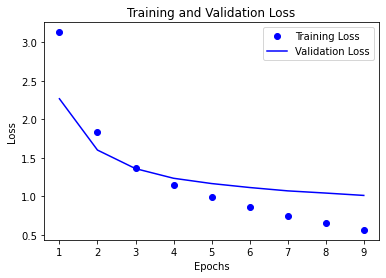

In [161]:
loss_values = history_df['loss']
val_loss_values = history_df['val_loss']
epochs = range(1, len(loss_values) + 1 )
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

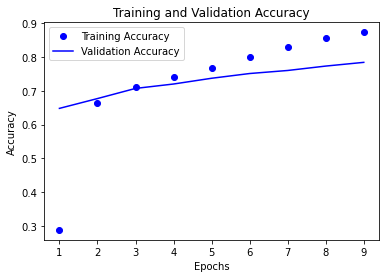

In [162]:
acc_values = history_df['accuracy']
val_acc_vals = history_df['val_accuracy']
plt.plot(epochs, acc_values,'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_vals, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [163]:
result = model.evaluate(X_test, y_test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 1.1146 - accuracy: 0.7631
